# Competitive Landscape Analysis of Indonesian Online Transportation Apps Through Google Play Store Reviews

## Data Preparation

In [38]:
import pandas as pd
abc = pd.read_csv("../data/app_reviews_cleaned.csv")
abc.to_parquet("../data/app_reviews_cleaned.parquet")

In [26]:
import pandas as pd

# Read in CSV
# df = pd.read_csv("../data/app_reviews.csv")
# Read in parquet
df = pd.read_parquet("../data/app_reviews.parquet")
# Analysis start from 2022
## Filter out less than year 2022
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] >= '2022-01-01']
print(df.shape)
print(df.groupby('app_name')['app_name'].count())
df.head()

(1056647, 8)
app_name
gojek      351497
grab       240113
indrive     99529
maxim      365508
Name: app_name, dtype: int64


,Unnamed: 0,index,app_name,platform,date,user_name,rating,review_content
0,0,0,gojek,Google Play,2025-06-17 17:00:04,Pengguna Google,5,"Terimakasih udh mempercepat perjalanan, Smoga ..."
1,1,1,gojek,Google Play,2025-06-17 16:42:37,Pengguna Google,5,oke
2,2,2,gojek,Google Play,2025-06-17 16:40:58,Pengguna Google,1,terkadang UI terlihat seperti booking dibatalk...
3,3,3,gojek,Google Play,2025-06-17 16:36:50,Pengguna Google,5,yang ngantar makanan sangat ramah sopan dan be...
4,4,4,gojek,Google Play,2025-06-17 16:17:18,Pengguna Google,5,oke


In [27]:
from io import StringIO

# Show the first 5 rows of the dataframe
print("1. First 5 Rows of the Data:")
display(df.head())
print("-" * 50)

# Show concise summary of the dataframe (columns, non-null counts, data types)
print("2. Dataframe Info:")
# Using 'display' with 'df.info()' in a buffer to show it cleanly in Jupyter
buffer = StringIO()
df.info(buf=buffer)
print(buffer.getvalue())
print("-" * 50)

# Check for missing (null) values in each column
print("3. Missing Values per Column:")
print(df.isnull().sum())
print("-" * 50)

# Show descriptive statistics for numerical columns (like 'rating')
print("4. Descriptive Statistics for Ratings:")
display(df['rating'].describe())
print("-" * 50)

# Show the distribution of ratings
print("5. Rating Distribution (Value Counts):")
rating_counts = df['rating'].value_counts().sort_index()
display(rating_counts)

1. First 5 Rows of the Data:


,Unnamed: 0,index,app_name,platform,date,user_name,rating,review_content
0,0,0,gojek,Google Play,2025-06-17 17:00:04,Pengguna Google,5,"Terimakasih udh mempercepat perjalanan, Smoga ..."
1,1,1,gojek,Google Play,2025-06-17 16:42:37,Pengguna Google,5,oke
2,2,2,gojek,Google Play,2025-06-17 16:40:58,Pengguna Google,1,terkadang UI terlihat seperti booking dibatalk...
3,3,3,gojek,Google Play,2025-06-17 16:36:50,Pengguna Google,5,yang ngantar makanan sangat ramah sopan dan be...
4,4,4,gojek,Google Play,2025-06-17 16:17:18,Pengguna Google,5,oke


--------------------------------------------------
2. Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1056647 entries, 0 to 1507297
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Unnamed: 0      1056647 non-null  int64         
 1   index           1056647 non-null  int64         
 2   app_name        1056647 non-null  object        
 3   platform        1056647 non-null  object        
 4   date            1056647 non-null  datetime64[ns]
 5   user_name       1056647 non-null  object        
 6   rating          1056647 non-null  int64         
 7   review_content  1056647 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 72.6+ MB

--------------------------------------------------
3. Missing Values per Column:
Unnamed: 0        0
index             0
app_name          0
platform          0
date              0
user_name         0
rating     

count    1.056647e+06
mean     4.123894e+00
std      1.527441e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

--------------------------------------------------
5. Rating Distribution (Value Counts):


rating
1    173463
2     32271
3     37681
4     59708
5    753524
Name: count, dtype: int64

---
#### **1. Extremely Large & Representative Dataset**

**Findings:**

* The dataset contains **1,395,402 reviews** after filtering for the 2021-2025 timeframe.

**Insights:**

* This massive volume of data makes the upcoming analysis highly **representative** for understanding user sentiment toward transportation applications in Indonesia, particularly on the Android platform.


#### **2. Excellent Initial Data Quality**

**Findings:**

* There are only **9 missing values** in the `review_content` column out of a total of almost 1.4 million rows.

**Insights:**

* This exceptionally **high initial data quality** means that the data cleaning process won't be hindered by missing data. This allows the analysis to focus directly on text cleansing and insight extraction.

#### **3. Overall Sentiment Tends to Be Positive**

**Findings:**

* From descriptive statistics, the **average rating (mean) is 4.12**.

**Insights:**

* This figure indicates that user sentiment toward the four applications, in aggregate, tends to be **positive**. However, a relatively high **standard deviation (std) of 1.52** shows significant variation. This means that while many users give high ratings, a substantial number also give very low ratings. This variation suggests the potential to dig into specific complaints and issues from negative reviews.


#### **4. Most Users Give Extreme Ratings**

**Findings:**

* **75% of the data** (75th percentile) has a **rating of 5.0**, while **25% of the data** (25th percentile) has a rating of **4.0 or lower**.

**Insights:**

* This reinforces the assumption that users tend to give very **high ratings** (5 stars) when satisfied or **lower ratings** when experiencing problems. This polarization is ideal for binary sentiment classification tasks (positive vs. negative) because the distinctions are very clear.

---

## Data Distribution

Starting Data Distribution Analysis...
--------------------------------------------------
1. Review Count per Application:


app_name
maxim      365508
gojek      351497
grab       240113
indrive     99529
Name: count, dtype: int64

/tmp/ipykernel_8808/449476237.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_counts.index, y=review_counts.values, palette='viridis')


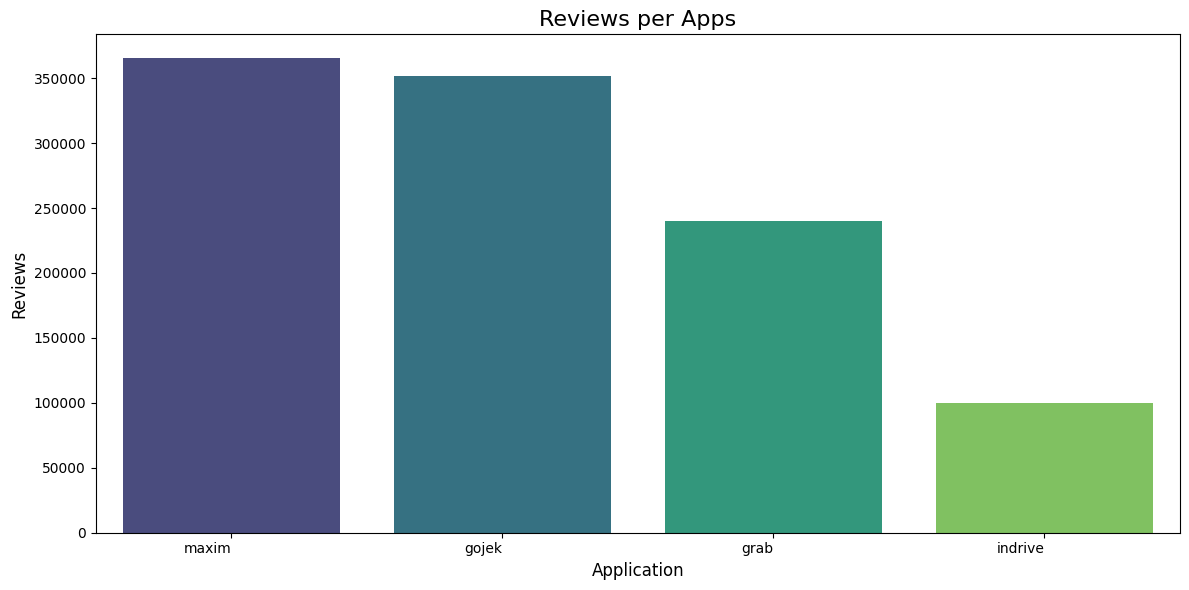

--------------------------------------------------

2. Review Time Range per Application:


,Oldest review,Latest review
app_name,,
gojek,01 January 2022,17 June 2025
grab,01 January 2022,17 June 2025
indrive,01 January 2022,17 June 2025
maxim,01 January 2022,17 June 2025


--------------------------------------------------
Analysis complete.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure the 'df' dataframe from the initial loading step is available.
print("Starting Data Distribution Analysis...")
print("-" * 50)


# --- 1. Analyze and Visualize Review Count per App ---
print("1. Review Count per Application:")
review_counts = df['app_name'].value_counts()
display(review_counts)

# Visualize the counts
plt.figure(figsize=(12, 6))
sns.barplot(x=review_counts.index, y=review_counts.values, palette='viridis')
plt.title('Reviews per Apps', fontsize=16)
plt.xlabel('Application', fontsize=12)
plt.ylabel('Reviews', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()
print("-" * 50)

# --- 2. Analyze Time Range per App ---
# Ensure 'tanggal' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by app_name and find the min and max date for each
time_range_df = df.groupby('app_name')['date'].agg(['min', 'max'])
time_range_df.rename(columns={'min': 'Oldest review', 'max': 'Latest review'}, inplace=True)

# Format the date for better readability
time_range_df['Oldest review'] = time_range_df['Oldest review'].dt.strftime('%d %B %Y')
time_range_df['Latest review'] = time_range_df['Latest review'].dt.strftime('%d %B %Y')

print("\n2. Review Time Range per Application:")
display(time_range_df)
print("-" * 50)
print("Analysis complete.")

---
### 1. Distribution of Review Volume

**Findings:**

* The top three applications, namely **Maxim (365,508 reviews), Gojek (351,497 reviews), and Grab (240,113 reviews)**, have a very comparable volume of reviews. InDrive has a significantly smaller number of reviews **(99,529 reviews)** compared to its three main competitors.

**Insights:**

* The equality in data volume among Gojek, Maxim, and Grab makes direct comparisons between them very fair and balanced.
* The lower number of inDrive reviews needs to be noted. Although the volume is still very large and sufficient for analysis, the insights generated for inDrive might have a slightly different level of representation compared to the other applications. This needs to be considered when drawing final conclusions.


### 2. Review Timeframe

**Insights:**

* The data collection timeframe for all four applications is highly overlapping and comparable. This is a very strong point as it allows for a fair **time-series analysis** of trends over time.
* The difference in Gojek's start date is not significant in the context of a data range spanning more than three years, thus the trend comparison between all four applications remains valid.

## Data Cleaning

In [29]:
import pandas as pd
import re
import string
import nltk
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [30]:
# --- Robust NLTK Data Setup (for Stopwords only) ---
# This function ensures the 'stopwords' package is available.
def ensure_nltk_data():
    """
    Checks for NLTK 'stopwords' package, downloads if missing.
    """
    try:
        stopwords.words('indonesian')
    except LookupError:
        print("Indonesian 'stopwords' not found. Downloading...")
        # Downloads to the default NLTK data path
        nltk.download('stopwords')
        print("'stopwords' download complete.")

# Run the setup function
ensure_nltk_data()

In [31]:
# --- 1. Define Cleaning Functions ---

# Function for case folding and removing numbers, punctuation, and extra whitespace
def clean_text_basic(text):
    # Make sure the input is a string
    if not isinstance(text, str):
        return ""
    # Convert to lowercase
    text = text.lower()
    
    # ADDED: Remove emojis
    # This regex removes most of the common emoji characters.
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Remove punctuation
    text = text.translate(str.maketrans("","",string.punctuation))
    # Remove extra whitespace
    text = text.strip()
    return text

# Create a dictionary for slang word normalization
slang_dict = {
    'yg': 'yang', 'ga': 'tidak', 'gak': 'tidak', 'gk': 'tidak', 'tdk': 'tidak',
    'nya': 'nya', 'bgt': 'banget', 'bangettt': 'banget', 'utk': 'untuk',
    'jg': 'juga', 'sih': 'sih', 'aja': 'saja', 'sya': 'saya', 'klo': 'kalau',
    'dah': 'sudah', 'udh': 'sudah', 'sdh': 'sudah', 'trs': 'terus', 'tros': 'terus',
    'pas': 'saat', 'dg': 'dengan', 'sm': 'sama', 'tp': 'tapi', 'tpi': 'tapi',
    'dr': 'dari', 'dpt': 'dapat', 'min': 'admin', 'adminnya': 'admin',
    'kak': 'kakak', 'ka': 'kakak', 'auto': 'otomatis', 'cancel': 'batal',
    'apk': 'aplikasi', 'aplikasinya': 'aplikasi', 'app': 'aplikasi',
    'drivernya': 'pengemudi', 'driver': 'pengemudi',
    # Add more slang words you find here
}

def normalize_slang(text):
    # UPDATED: Use simple text.split() instead of word_tokenize
    words = text.split()
    normalized_words = [slang_dict[word] if word in slang_dict else word for word in words]
    # Join the words back into a sentence
    return ' '.join(normalized_words)

# Function for stopword removal
stop_words_indonesian = stopwords.words('indonesian')
# Add custom stopwords if needed
custom_stopwords = ['sih', 'nya', 'kak', 'ka','gojek','grab','maxim','indrive']
stop_words_indonesian.extend(custom_stopwords)
stop_words_indonesian = set(stop_words_indonesian)

def remove_stopwords(text):
    # UPDATED: Use simple text.split() instead of word_tokenize
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words_indonesian]
    return ' '.join(filtered_words)


#--- 2. Apply all cleaning functions in a pipeline ---
print("\nStarting data cleaning process...")

# Make a copy to avoid SettingWithCopyWarning
# Use the dataframe from the previous cell, assuming it's named 'df'
df_cleaned = df.copy()

# Drop rows where 'review_content' is missing, if any
df_cleaned.dropna(subset=['review_content'], inplace=True)

# Apply the cleaning pipeline
df_cleaned['review_cleaned'] = df_cleaned['review_content'].apply(clean_text_basic)
df_cleaned['review_cleaned'] = df_cleaned['review_cleaned'].apply(normalize_slang)
df_cleaned['review_cleaned'] = df_cleaned['review_cleaned'].apply(remove_stopwords)

print("Data cleaning process completed.")
print("-" * 50)

# --- 3. Display Comparison ---
print("Displaying comparison for a few reviews (before vs. after):")

# Select a few random samples to show the difference
# Using try-except in case there are fewer than 5 rows
try:
    comparison_sample = df_cleaned.sample(5)
    for index, row in comparison_sample.iterrows():
        print(f"Original  : {row['review_content']}")
        print(f"Cleaned   : {row['review_cleaned']}")
        print("-" * 20)
except (ValueError, KeyError):
    print("Not enough data to sample or column not found. Showing all available data.")
    # Show the first few rows if sampling fails
    for index, row in df_cleaned.head().iterrows():
        print(f"Original  : {row['review_content']}")
        print(f"Cleaned   : {row['review_cleaned']}")
        print("-" * 20)
        
# Display the head of the new dataframe with the cleaned column
print("\nFirst 5 rows of the dataframe with 'review_cleaned' column:")
display(df_cleaned[['review_content', 'review_cleaned']].head())

df_cleaned.to_csv("../data/app_reviews_cleaned.csv")


Starting data cleaning process...
Data cleaning process completed.
--------------------------------------------------
Displaying comparison for a few reviews (before vs. after):
Original  : terima kasih
Cleaned   : terima kasih
--------------------
Original  : Uenak Muantab... Silahkan coba
Cleaned   : uenak muantab silahkan coba
--------------------
Original  : Saya berkali coba fitur GO-SEND, gabisa trs
Cleaned   : berkali coba fitur gosend gabisa
--------------------
Original  : MANTAP
Cleaned   : mantap
--------------------
Original  : Semoga lbh bagus lagi boss
Cleaned   : semoga lbh bagus boss
--------------------

First 5 rows of the dataframe with 'review_cleaned' column:


,review_content,review_cleaned
0,"Terimakasih udh mempercepat perjalanan, Smoga ...",terimakasih mempercepat perjalanan smoga sllu ...
1,oke,oke
2,terkadang UI terlihat seperti booking dibatalk...,terkadang ui booking dibatalkan order dibatalk...
3,yang ngantar makanan sangat ramah sopan dan be...,ngantar makanan ramah sopan berwibawa
4,oke,oke


The outcome of this cleaning process is a new text data column (`review_cleaned`) that's ready for analysis. The text within it is now consistent, free from noise, and more semantically dense. This cleaned dataset forms the absolute necessary foundation for all subsequent analyses, including exploratory analysis (like Word Clouds and Aspect Analysis) and machine learning model building. The quality of the insights generated will heavily depend on the success of this cleaning phase.

## Exploratory Data Analysis (EDA)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Sentiment labeling complete.
Full distribution of sentiments (including Neutral for context):
sentiment
Positif    813232
Negatif    205734
Netral      37681
Name: count, dtype: int64
--------------------------------------------------
Data prepared for modeling by removing Neutral reviews.
Total reviews for modeling (Positive/Negative): 1018966
sentiment
Positif    813232
Negatif    205734
Name: count, dtype: int64
--------------------------------------------------


/tmp/ipykernel_8808/1298074494.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_model_data, x='sentiment', order=['Positif', 'Negatif'], palette={'Positif':'#4CAF50', 'Negatif':'#F44336'})


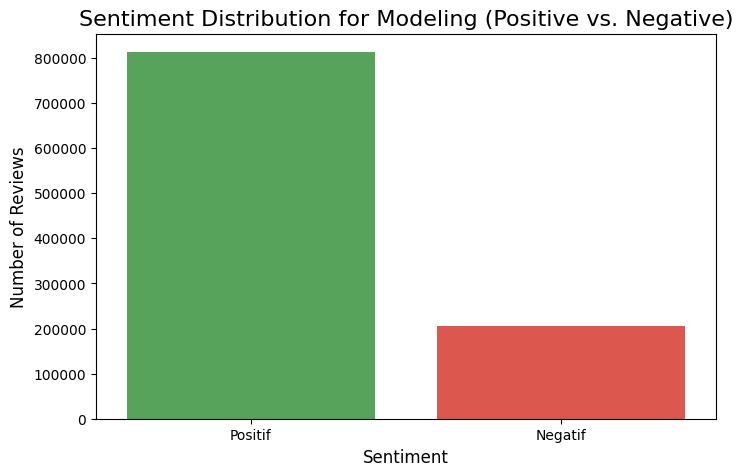

Generating Word Clouds...


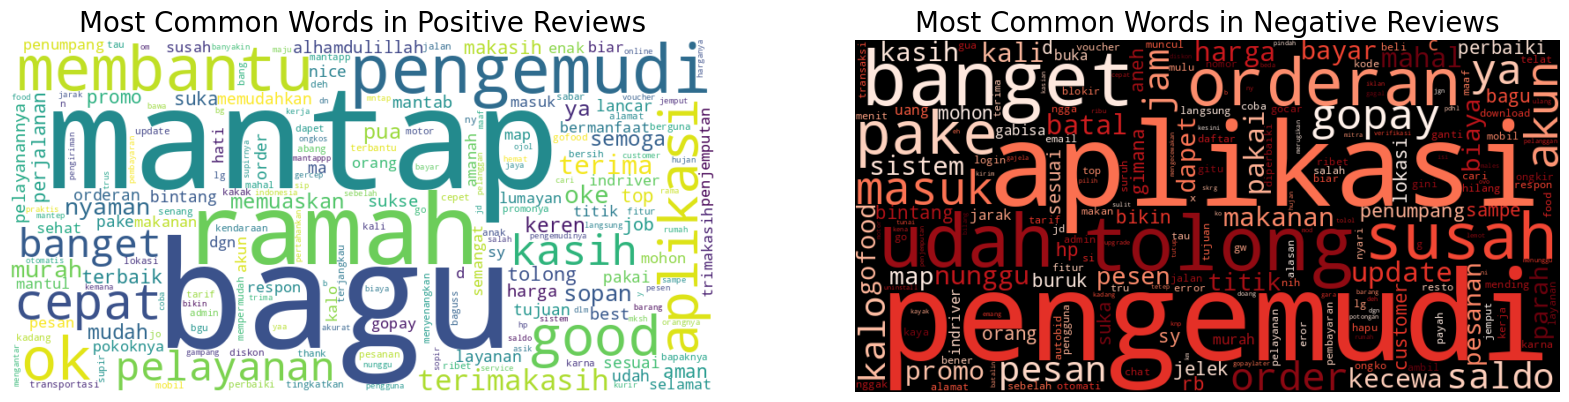

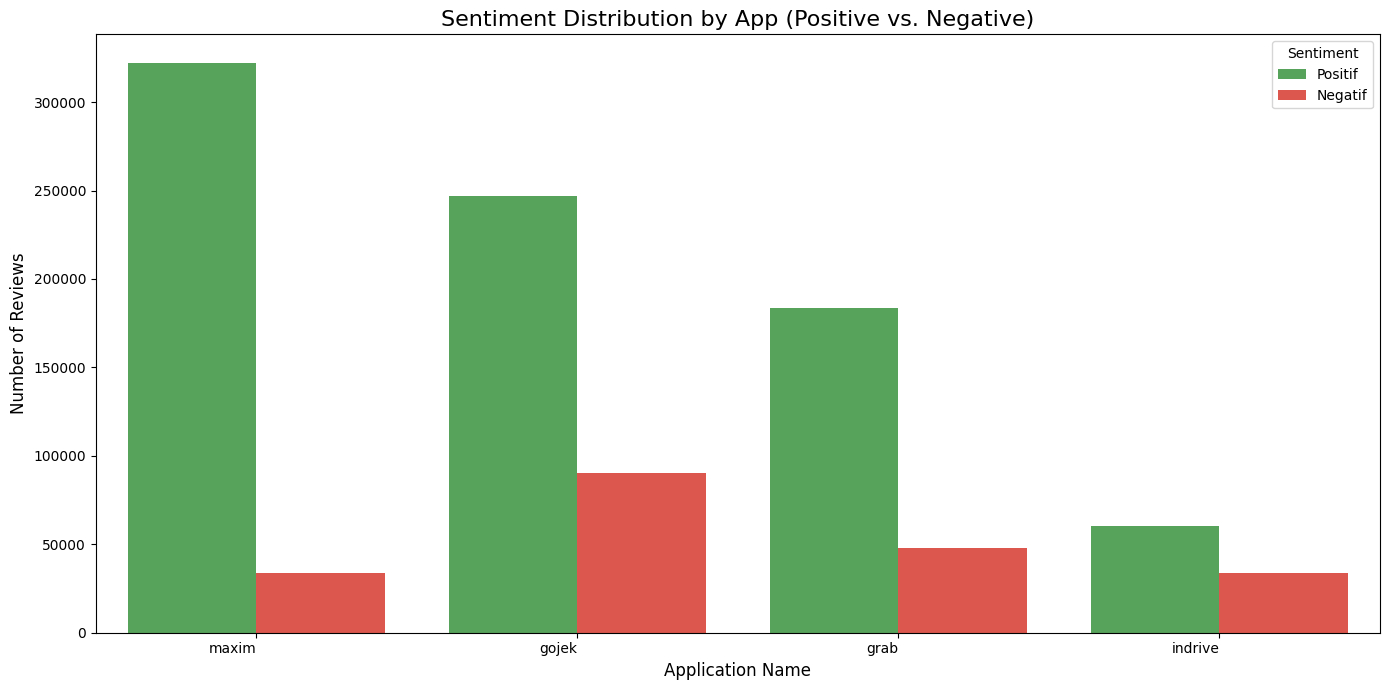

In [33]:
# --- 1. Sentiment Labeling ---
def label_sentiment(row):
    if row['rating'] <= 2:
        return 'Negatif'
    elif row['rating'] == 3:
        return 'Netral'
    elif row['rating'] >= 4:
        return 'Positif'

# Apply the function to create the new 'sentiment' column
df_cleaned['sentiment'] = df_cleaned.apply(label_sentiment, axis=1)
df_cleaned.to_csv("../data/app_reviews_cleaned.csv")

print("Sentiment labeling complete.")
print("Full distribution of sentiments (including Neutral for context):")
print(df_cleaned['sentiment'].value_counts())
print("-" * 50)

# --- 2. Prepare Data for Binary Classification ---
# For building the model, we will focus on clear positive and negative sentiments.
# This is a common practice to create a more effective binary classification model.
df_model_data = df_cleaned[df_cleaned['sentiment'] != 'Netral'].copy()
print(f"Data prepared for modeling by removing Neutral reviews.")
print(f"Total reviews for modeling (Positive/Negative): {len(df_model_data)}")
print(df_model_data['sentiment'].value_counts())
print("-" * 50)

# --- 3. Visualize Sentiment Distribution (Positive vs. Negative) ---
plt.figure(figsize=(8, 5))
# Use the new df_model_data for visualization
sns.countplot(data=df_model_data, x='sentiment', order=['Positif', 'Negatif'], palette={'Positif':'#4CAF50', 'Negatif':'#F44336'})
plt.title('Sentiment Distribution for Modeling (Positive vs. Negative)', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()

# --- 4. Generate and Display Word Clouds ---
# This part already focuses on positive and negative, so we use df_model_data
positive_reviews = " ".join(review for review in df_model_data[df_model_data['sentiment'] == 'Positif']['review_cleaned'].astype(str))
negative_reviews = " ".join(review for review in df_model_data[df_model_data['sentiment'] == 'Negatif']['review_cleaned'].astype(str))

print("Generating Word Clouds...")

# Generate Positive Word Cloud
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(positive_reviews)

# Generate Negative Word Cloud
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds', collocations=False).generate(negative_reviews)

# Display the Word Clouds
plt.figure(figsize=(20, 10))

# Positive
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Most Common Words in Positive Reviews', fontsize=20)
plt.axis('off')

# Negative
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Most Common Words in Negative Reviews', fontsize=20)
plt.axis('off')

plt.show()

# --- 5. Compare Sentiment Across Apps (Positive vs. Negative) ---
plt.figure(figsize=(14, 7))
# Use df_model_data here as well
sns.countplot(data=df_model_data, x='app_name', hue='sentiment', 
              order=df_model_data['app_name'].value_counts().index, 
              hue_order=['Positif', 'Negatif'],
              palette={'Positif':'#4CAF50', 'Negatif':'#F44336'})
plt.title('Sentiment Distribution by App (Positive vs. Negative)', fontsize=16)
plt.xlabel('Application Name', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.legend(title='Sentiment')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

---
### 1. Overall Sentiment Distribution

**Findings:**

* Out of a total of 1,056,647 reviews analyzed, **813,232 (approximately 80%)** were classified as **Positive** sentiment. The remaining **205,734 (approximately 20%)** were classified as **Negative** sentiment.

**Insights:**

* In aggregate, user sentiment towards online transportation services in Indonesia is highly **positive**. The ratio of positive to negative reviews is roughly 4 to 1.
* Nevertheless, the absolute number of negative reviews, exceeding **269,000**, represents a "gold mine" for further analysis. This volume is more than sufficient to uncover specific and recurring complaint patterns, which can provide highly valuable recommendations for improvement.

### 2. Comparison of Sentiment Distribution per Application

**Key Findings:**

* **Maxim** shows the best sentiment performance, with the highest proportion of positive reviews and the lowest number of negative reviews compared to its competitors.
* **Gojek and Grab** have very similar sentiment profiles. Both have a high number of positive reviews, but this is balanced by a significant number of negative reviews, even higher in absolute terms than Maxim.
* **inDrive**, despite having the fewest total reviews, shows a considerable proportion of negative to positive reviews, similar to Gojek and Grab.

**In-depth Insights:**

* **Maxim's Positive Dominance:** Maxim's superiority in positive sentiment could be a strong indication that their strategy (often related to more competitive pricing) is very well received by the market. The low number of complaints suggests that even if there are shortcomings, they are outweighed by the primary advantages offered.
* **Challenges for Gojek & Grab:** As larger and more established market players, Gojek and Grab face a higher volume of complaints. This is natural with a larger user base. Their challenge is how to manage and respond to this large volume of complaints to maintain customer loyalty. Insights from their negative reviews will be crucial for service improvement.
* **inDrive's Position:** As a newer or smaller player, inDrive's sentiment ratio, which is similar to Gojek and Grab, indicates that they face comparable challenges in satisfying users.

## Time Series Analysis

Starting Time-Series Analysis...
Data prepared for time-series analysis.
--------------------------------------------------


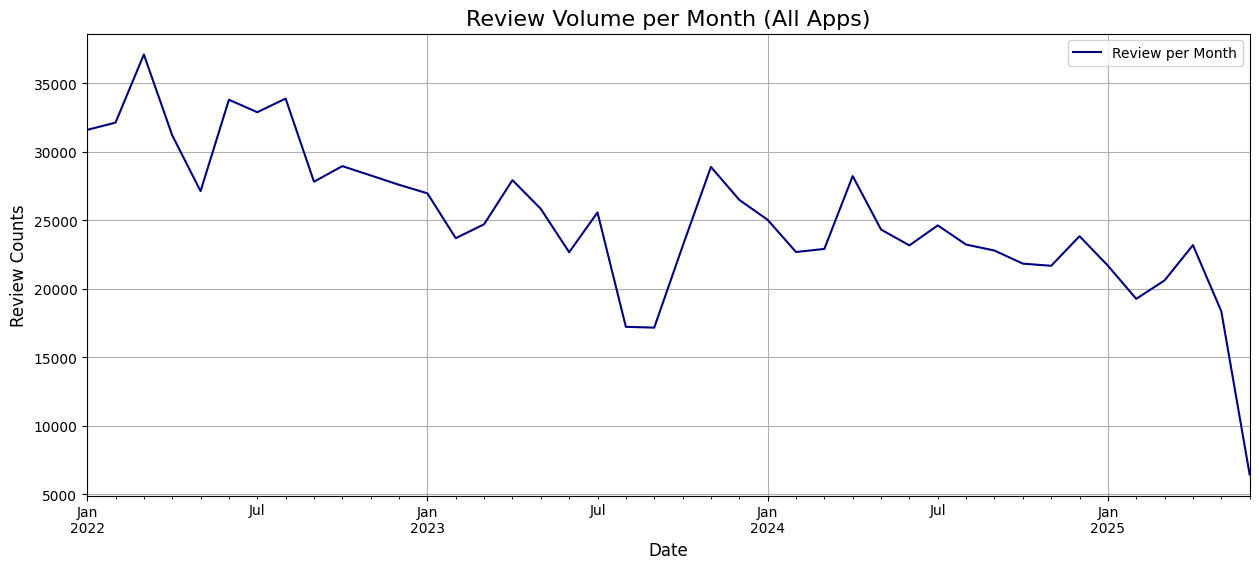

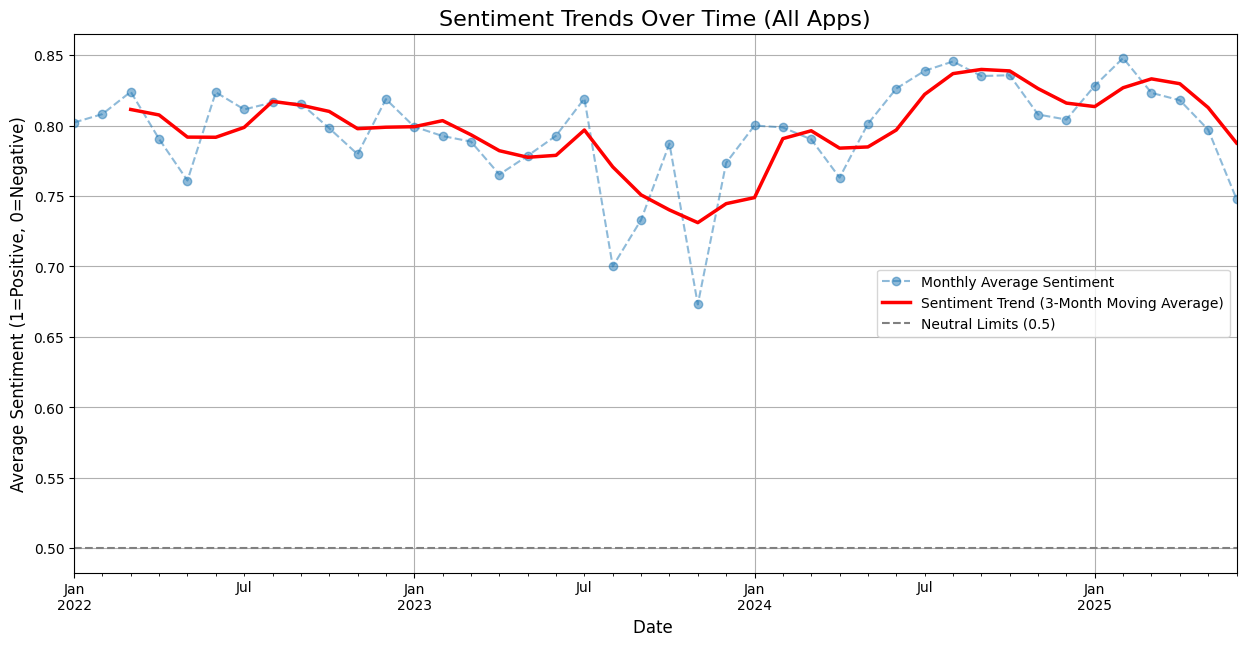


Generating comparative time-series plot for each app...


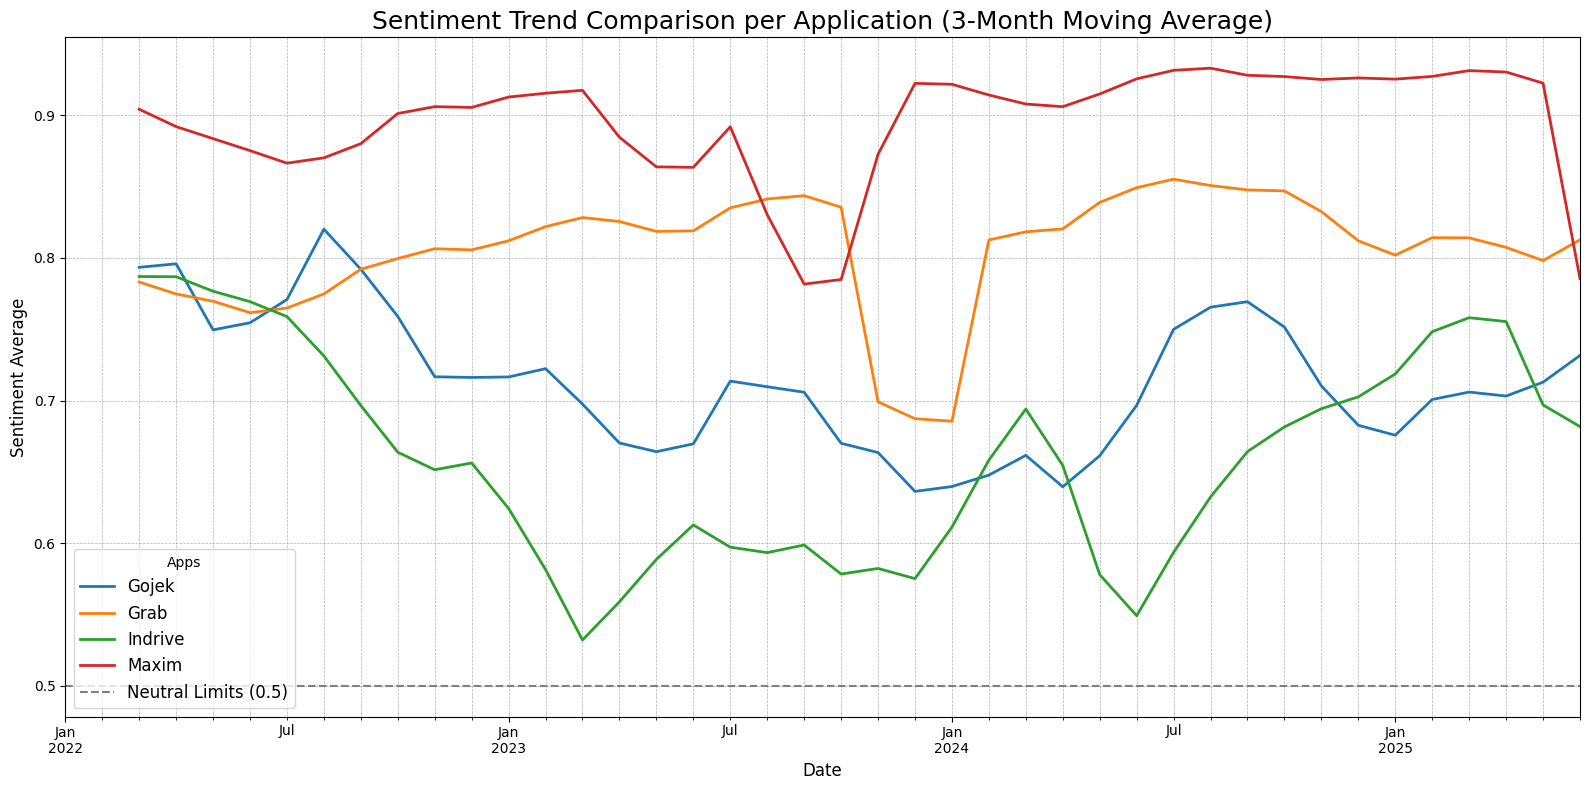

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'df_cleaned' dataframe from previous steps is available.
# It should have a 'tanggal' and 'sentiment' column.

print("Starting Time-Series Analysis...")

# --- 1. Prepare Data for Time-Series Analysis ---
# Create a new dataframe to work with
df_time = df_cleaned.copy()

# Convert 'tanggal' column to datetime objects
df_time['date'] = pd.to_datetime(df_time['date'])

# Set 'date' as the index of the dataframe
# We keep 'date' as a column for grouping later
# df_time.set_index('date', inplace=True) # This will be done later inside the functions

# To analyze sentiment trends, we map Positive to 1 and Negative to 0.
# The average will then represent the proportion of positive reviews.
df_time['sentiment_score'] = df_time['sentiment'].map({'Positif': 1, 'Negatif': 0})

print("Data prepared for time-series analysis.")
print("-" * 50)

# --- 2. Analyze and Visualize Review Volume Over Time ---
# Resample the data by month and count the number of reviews
monthly_reviews = df_time.set_index('date').resample('ME').size()

plt.figure(figsize=(15, 6))
monthly_reviews.plot(label='Review per Month', color='navy')
plt.title('Review Volume per Month (All Apps)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Review Counts', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# --- 3. Analyze and Visualize Sentiment Trend Over Time (Overall) ---
# Resample by month and calculate the average sentiment score
monthly_sentiment = df_time.set_index('date')['sentiment_score'].resample('ME').mean()

# Calculate a 3-month moving average to see the trend more clearly
moving_avg_sentiment = monthly_sentiment.rolling(window=3).mean()


plt.figure(figsize=(15, 7))
monthly_sentiment.plot(label='Monthly Average Sentiment', style='o--', alpha=0.5)
moving_avg_sentiment.plot(label='Sentiment Trend (3-Month Moving Average)', color='red', linewidth=2.5)
plt.title('Sentiment Trends Over Time (All Apps)', fontsize=16)
plt.xlabel('Date ', fontsize=12)
plt.ylabel('Average Sentiment (1=Positive, 0=Negative)', fontsize=12)
plt.axhline(y=0.5, color='grey', linestyle='--', label='Neutral Limits (0.5)')
plt.legend()
plt.grid(True)
plt.show()

# --- 4. NEW: Analyze and Visualize Sentiment Trend per App ---
print("\nGenerating comparative time-series plot for each app...")

# Create a temporary dataframe for this plot to avoid state issues.
df_plot = df_time.copy()

# MODIFIED: Make the code robust. If 'tanggal' is the index, reset it to be a column.
# This ensures that 'tanggal' is always available as a column for the next step.
if df_plot.index.name == 'tanggal':
    df_plot.reset_index(inplace=True)

plt.figure(figsize=(16, 8))
sns.set_palette("tab10") # Use a color palette with distinct colors

# Loop through each unique app name
for app in df_plot['app_name'].unique():
    # Filter data for the specific app
    app_data = df_plot[df_plot['app_name'] == app].copy()
    
    # Resample and calculate the 3-month moving average for that app's sentiment
    # We are now certain 'tanggal' is a column, so we can set it as the index here for resampling.
    app_sentiment_trend = app_data.set_index('date')['sentiment_score'].resample('ME').mean().rolling(window=3).mean()
    
    # Plot the trend line for the app
    app_sentiment_trend.plot(label=app.capitalize(), linewidth=2)

plt.title('Sentiment Trend Comparison per Application (3-Month Moving Average)', fontsize=18)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sentiment Average', fontsize=12)
plt.axhline(y=0.5, color='grey', linestyle='--', label='Neutral Limits (0.5)')
plt.legend(title='Apps', fontsize='large')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

---
### 1. Analysis of Monthly Review Volume

**Findings:**

* The "Monthly Review Volume" chart shows significant fluctuations over time. There's a very high peak in review volume towards the **end of 2021 and early 2022**, followed by a gradual downward trend in volume with some small spikes.

**Insights:**

* **Peak Activity:** The peak in late 2021/early 2022 could coincide with the post-pandemic period when community mobility drastically increased, or perhaps it was related to major marketing campaigns from these applications.
* **Market Stabilization:** The subsequent downward trend in volume might indicate that the market is stabilizing. Loyal users may no longer frequently leave reviews, and new user growth might not be as rapid as in previous periods.

---
### 2. Analysis of Overall Sentiment Trend

**Findings:**

* The "Sentiment Trend Over Time" chart shows that the average monthly sentiment (dashed blue line) is always well above the "Neutral Threshold (0.5)". The red trend line (3-Month Moving Average) indicates that the aggregate sentiment remains stable at a very positive level (around 0.80 or 80% positive) throughout the analysis period.

**Insights:**

* **Consistent Market Satisfaction:** Overall, the online transportation industry has successfully maintained a consistently high level of customer satisfaction from 2021 to 2025. There are no drastic declines indicating a major crisis of confidence at the industry level.
* **Resilience:** Despite monthly fluctuations (ups and downs of the blue line), the long-term trend remains strong. This indicates that even when minor issues arise, they are not enough to significantly damage the positive market perception.

---
### 3. Comparison of Sentiment Trends Across Applications

**Key Findings:**

* **Maxim (Red Line):** Consistently the application with the highest and most stable sentiment trend throughout the period. Its position is almost always above all competitors.
* **Gojek (Blue Line) & Grab (Orange Line):** These two applications show a very dynamic pattern and often compete closely. Their sentiment tends to be more volatile than Maxim. There are periods where Grab's sentiment surpasses Gojek's, and vice versa.
* **inDrive (Green Line):** Shows the highest sentiment volatility. There are periods where its sentiment was able to compete with Gojek and Grab (early 2022), but it also experienced the sharpest decline in mid-2022 to early 2024, before finally showing a recovery trend.

## Baseline Model (TF-IDF + Logistic Regression)

Data has been split into training and testing sets.
Training set size: 815172 reviews
Testing set size: 203794 reviews
--------------------------------------------------
Building and training the baseline model (TF-IDF + Logistic Regression)...
Model training complete.
--------------------------------------------------
Evaluating the model on the test set...
Accuracy: 0.9312
--------------------
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.85      0.81      0.83     41147
     Positif       0.95      0.96      0.96    162647

    accuracy                           0.93    203794
   macro avg       0.90      0.88      0.89    203794
weighted avg       0.93      0.93      0.93    203794

--------------------
Confusion Matrix:


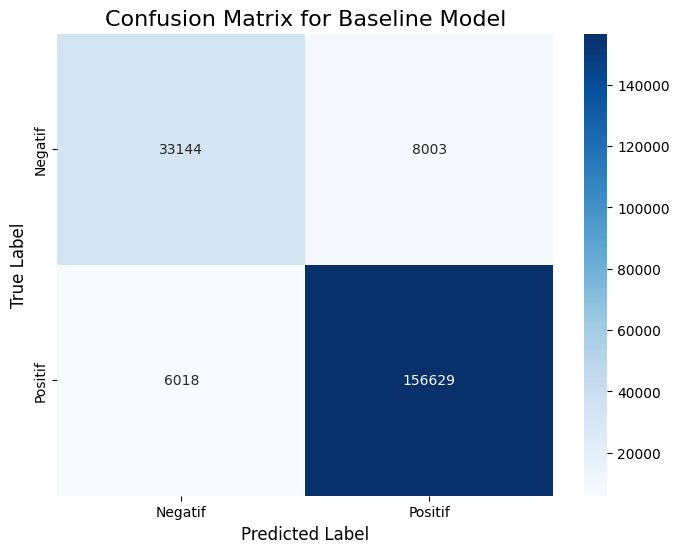

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# --- 1. Prepare Data for Modeling ---
# Define features (X) and target (y)
X = df_model_data['review_cleaned'].astype(str)
y = df_model_data['sentiment']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, # for reproducibility
    stratify=y # ensures the same proportion of sentiments in train and test sets
)

print(f"Data has been split into training and testing sets.")
print(f"Training set size: {len(X_train)} reviews")
print(f"Testing set size: {len(X_test)} reviews")
print("-" * 50)


# --- 2. Build and Train the Baseline Model ---
# We use a Pipeline to chain the vectorizer and the classifier together.
# This simplifies the workflow and prevents data leakage.

print("Building and training the baseline model (TF-IDF + Logistic Regression)...")

baseline_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42)) # max_iter increased for convergence
])

# Train the model on the training data
baseline_model.fit(X_train, y_train)

print("Model training complete.")
print("-" * 50)


# --- 3. Evaluate the Model ---
print("Evaluating the model on the test set...")

# Make predictions on the test data
y_pred = baseline_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("-" * 20)

# Display the classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("-" * 20)

# Display the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negatif', 'Positif'], 
            yticklabels=['Negatif', 'Positif'])
plt.title('Confusion Matrix for Baseline Model', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

---
### 1. Overall Performance Analysis (Accuracy)

**Findings:**

* This baseline model achieved an accuracy level of **93.12%**.

**Insights:**

* This very high accuracy indicates that the model is able to correctly predict the sentiment of unseen reviews 93 out of 100 times. For a relatively simple baseline model, this result is very strong and impressive. It suggests that word patterns within the review data are very clear and can be learned well even by classic statistical models.

---
### 2. Performance Analysis per Class (Classification Report)

**Findings (Positive Class):**

* The model shows outstanding performance for the 'Positive' class with **precision 0.95, recall 0.96, and F1-score 0.96.**

**Insights:**

* This means that if the model predicts a review as 'Positive', that prediction is 95% correct. Additionally, the model successfully identified 96% of all actual positive reviews present in the test data.

**Findings (Negative Class):**

* For the 'Negative' class, the model's performance is slightly lower but still very good, with **precision 0.84, recall 0.80, and F1-score 0.82.**

**Insights:**

* The model makes slightly more errors when predicting negative reviews. This is natural because the amount of negative review data is significantly less than positive reviews (an imbalanced data condition), so the model has fewer examples to "learn" to recognize complaint patterns.
---

## Feature Importance Analysis

Starting feature importance analysis for each app...
------------------------------------------------------------
Processing: Gojek


/tmp/ipykernel_8808/3352393998.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i, 0], x='coefficient', y='word', data=top_positive_keywords, palette='Greens_r')
/tmp/ipykernel_8808/3352393998.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i, 1], x='coefficient', y='word', data=top_negative_keywords, palette='Reds_r')


Processing: Grab


/tmp/ipykernel_8808/3352393998.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i, 0], x='coefficient', y='word', data=top_positive_keywords, palette='Greens_r')
/tmp/ipykernel_8808/3352393998.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i, 1], x='coefficient', y='word', data=top_negative_keywords, palette='Reds_r')


Processing: Indrive


/tmp/ipykernel_8808/3352393998.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i, 0], x='coefficient', y='word', data=top_positive_keywords, palette='Greens_r')
/tmp/ipykernel_8808/3352393998.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i, 1], x='coefficient', y='word', data=top_negative_keywords, palette='Reds_r')


Processing: Maxim


/tmp/ipykernel_8808/3352393998.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i, 0], x='coefficient', y='word', data=top_positive_keywords, palette='Greens_r')
/tmp/ipykernel_8808/3352393998.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i, 1], x='coefficient', y='word', data=top_negative_keywords, palette='Reds_r')


------------------------------------------------------------
Analysis complete.


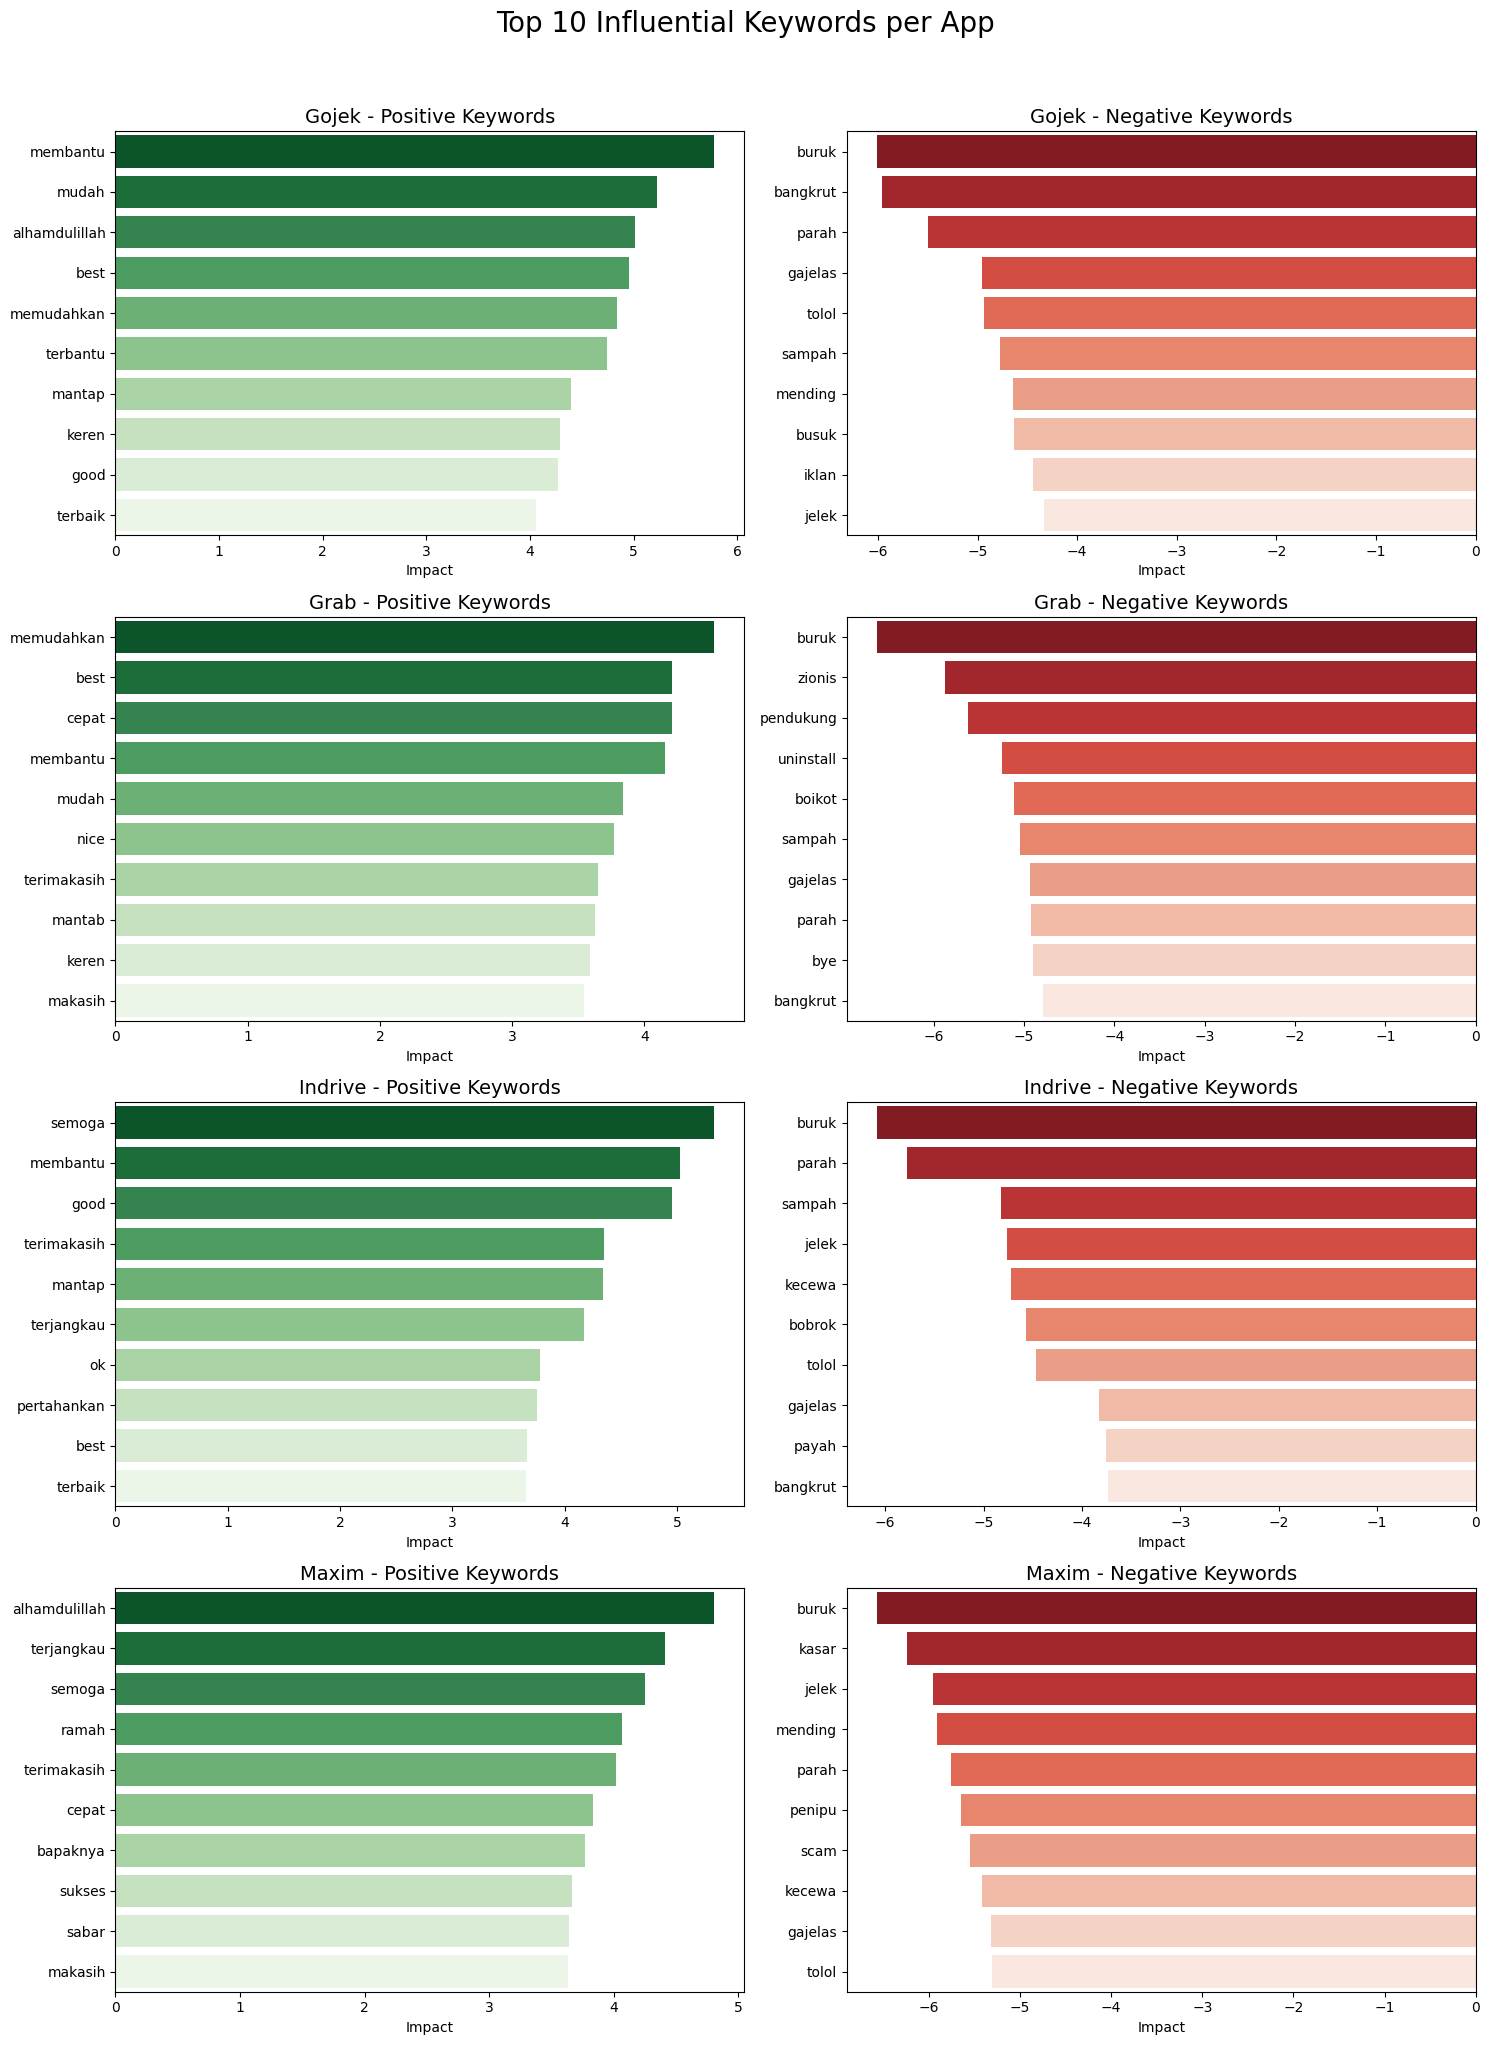

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Make sure 'df_model_data' (with positive/negative labels) is available in memory.

# Get the list of unique app names
app_names = df_model_data['app_name'].unique()

# Create a figure to hold all the subplots
# We'll create a 4x2 grid: 4 apps, 2 plots per app (positive/negative)
fig, axes = plt.subplots(len(app_names), 2, figsize=(15, 20))
fig.suptitle('Top 10 Influential Keywords per App', fontsize=20, y=1.02)


print("Starting feature importance analysis for each app...")
print("-" * 60)

# Loop through each app and its corresponding subplot axes
for i, app_name in enumerate(app_names):
    print(f"Processing: {app_name.capitalize()}")
    
    # --- 1. Filter Data for the Current App ---
    app_df = df_model_data[df_model_data['app_name'] == app_name]
    
    # Define features (X) and target (y) for this specific app
    X_app = app_df['review_cleaned'].astype(str)
    y_app = app_df['sentiment']
    
    # --- 2. Train a New Model Specifically for This App ---
    # We create a new pipeline for each app to get app-specific coefficients
    app_model = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)), # Limit features for efficiency
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    app_model.fit(X_app, y_app)
    
    # --- 3. Extract Feature Importance for This App's Model ---
    vectorizer = app_model.named_steps['tfidf']
    classifier = app_model.named_steps['classifier']
    feature_names = vectorizer.get_feature_names_out()
    coefficients = classifier.coef_[0]
    
    coef_df = pd.DataFrame({
        'word': feature_names,
        'coefficient': coefficients
    }).sort_values(by='coefficient', ascending=False)
    
    # Get top 10 positive and negative keywords
    top_positive_keywords = coef_df.head(10)
    top_negative_keywords = coef_df.tail(10).sort_values(by='coefficient', ascending=True)
    
    # --- 4. Visualize the Results on the Subplots ---
    
    # Plot Top Positive Keywords
    sns.barplot(ax=axes[i, 0], x='coefficient', y='word', data=top_positive_keywords, palette='Greens_r')
    axes[i, 0].set_title(f'{app_name.capitalize()} - Positive Keywords', fontsize=14)
    axes[i, 0].set_xlabel('Impact')
    axes[i, 0].set_ylabel('')

    # Plot Top Negative Keywords
    sns.barplot(ax=axes[i, 1], x='coefficient', y='word', data=top_negative_keywords, palette='Reds_r')
    axes[i, 1].set_title(f'{app_name.capitalize()} - Negative Keywords', fontsize=14)
    axes[i, 1].set_xlabel('Impact')
    axes[i, 1].set_ylabel('')

print("-" * 60)
print("Analysis complete.")

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

---
### Gojek: Focus on Functionality & Performance

* **Positive Sentiment:** Top keywords for Gojek are heavily oriented towards **functionality and utility**, such as `membantu` (helping), `terbantu` (helped), and `memudahkan` (making it easy). This shows that users value Gojek as a tool that fundamentally solves problems and simplifies their daily lives.

* **Negative Sentiment:** Primary complaints focus on **technical and performance issues**, with words like `bangkrut` (bankrupt), `buruk` (bad), `gajelas` (unclear/nonsensical), and `sampah` (trash). The appearance of `bangkrut` as a top complaint is very unique and could refer to users' perception of the company's financial condition potentially affecting service quality or promotions.


### Grab: Emotional Sentiment & Technical Issues

* **Positive Sentiment:** Grab's positive keywords are more **emotional and appreciative**, such as `best`, `alhamdulillah` (thank God), and `makasih` (thank you). This indicates that positive experiences with Grab often leave a strong personal impression on users.

* **Negative Sentiment:** Similar to Gojek, Grab's complaints center on **technical and service issues**, such as `zonk` (worthless/zero), `boikot` (boycott), and `uninstall`. The emergence of `boikot` as one of the main complaints could signal a larger issue or **negative campaign** affecting user perception during a certain period.

### inDrive: Price Perception & Disappointment

* **Positive Sentiment:** The main positive driver for inDrive is the word `terjangkau` (affordable). This clearly confirms that inDrive's primary value proposition in users' eyes is **lower prices** compared to competitors. General appreciative words like `semoga` (hopefully), `good`, and `mantap` (great) also appear.

* **Negative Sentiment:** Negative keywords for inDrive are very strong and indicate **deep disappointment**, such as `buruk` (bad), `parah` (terrible), and `kecewa` (disappointed). These words show that when users experience problems with inDrive, the impact feels very significant to them.


### Maxim: Combination of Price & Personal Service

* **Positive Sentiment:** Like inDrive, the word `terjangkau` (affordable) is a very strong driver of positive sentiment for Maxim, highlighting their advantage in terms of price. Uniquely, words related to **personal interaction** such as `ramah` (friendly) and `sabar` (patient) also appear. This indicates that users not only appreciate the low prices but also the quality of service from the drivers.

* **Negative Sentiment:** Main complaints for Maxim are similar to inDrive, centering on words that indicate **poor service quality** such as `buruk` (bad), `kasar` (rude), and `mending` (likely from the phrase "mending pakai aplikasi lain" - "better use another app").

---

## Aspect-Based Sentiment Analysis

Aspect tagging complete. Sample of exploded data:


,aspects,sentiment,review_cleaned
0,Umum,Positif,terimakasih mempercepat perjalanan smoga sllu ...
1,Umum,Positif,oke
2,Aplikasi,Negatif,terkadang ui booking dibatalkan order dibatalk...
2,Pengemudi,Negatif,terkadang ui booking dibatalkan order dibatalk...
2,Layanan,Negatif,terkadang ui booking dibatalkan order dibatalk...


--------------------------------------------------
Preparing data for final visualization...


,app_name,aspects,sentiment,percentage
0,gojek,Aplikasi,Positif,0.444198
1,gojek,Customer Service,Positif,0.261187
2,gojek,Harga,Positif,0.455339
3,gojek,Layanan,Positif,0.529848
4,gojek,Pengemudi,Positif,0.384850


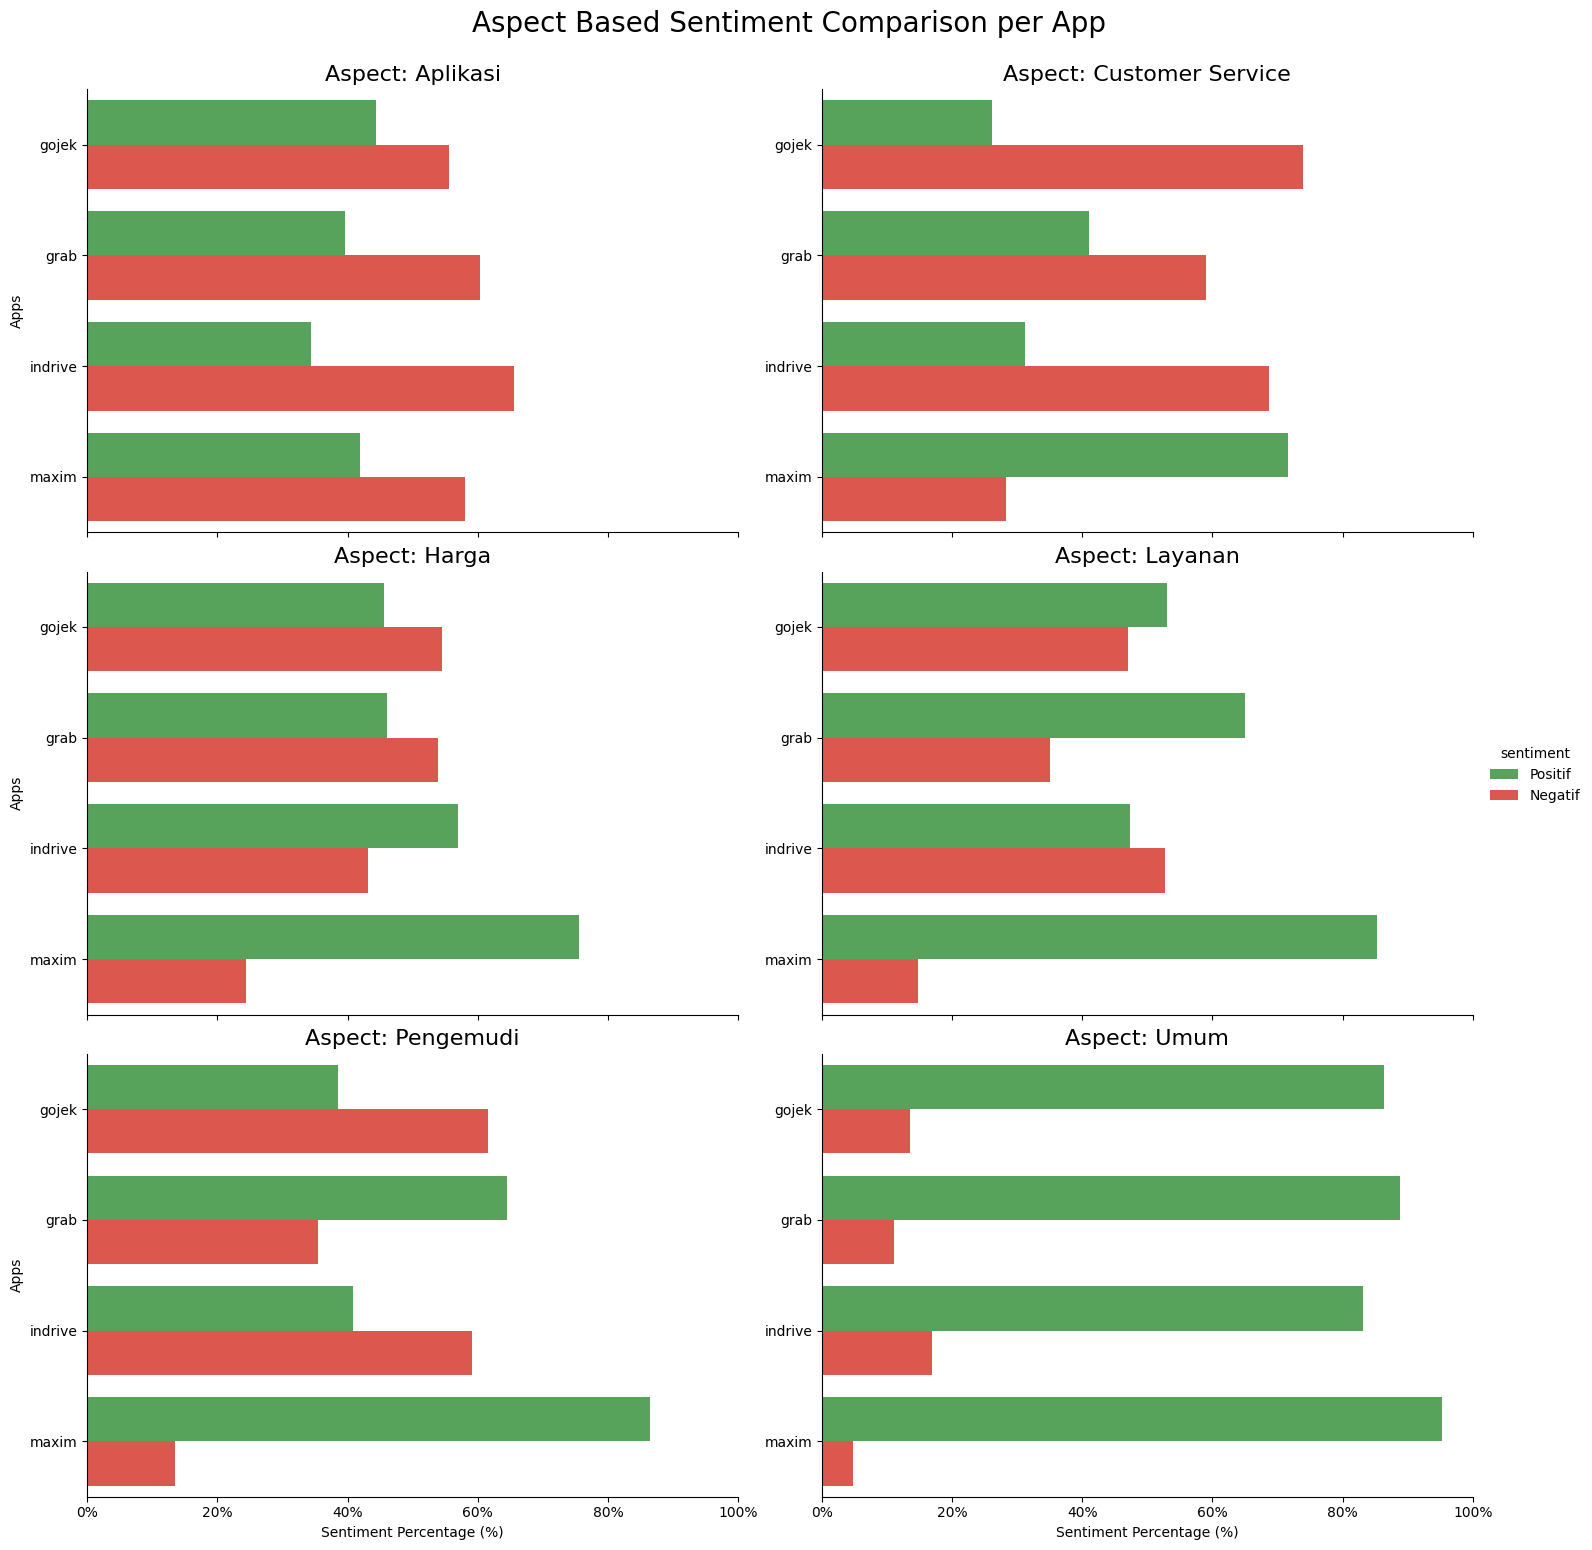

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'df_model_data' is available in memory from the previous steps.
# This dataframe contains cleaned reviews and sentiment labels (Positive/Negative).

# --- 1. Define Aspects and Keywords ---
# We create a dictionary where keys are the aspects and values are lists of related keywords.
aspect_keywords = {
    'Aplikasi': ['aplikasi', 'apk', 'app', 'update', 'eror', 'error', 'lambat', 'lemot', 'boikot',
                 'peta', 'lokasi', 'gps', 'susah', 'mudah','uninstall', 'bobrok','notifikasi', 'iklan', 'sistem'],
    'Harga': ['harga', 'terjangkau','tarif', 'mahal', 'murah', 'promo', 'diskon', 'biaya', 'ongkir', 'poin', 'poinnya'],
    'Pengemudi': ['pengemudi', 'driver', 'drivernya', 'ramah', 'sopan', 'kasar', 'ugal', 'baik', 'batal', 'cancel','ngebut'],
    'Layanan': ['layanan','payah','grab','pertahankan', 'cepat', 'lama', 'order', 'jemput', 'antar', 'makanan', 'gojek', 'grab', 
                'maxim', 'indrive', 'pesan', 'pesanan','gofood','go food','pelayanan','cepat','kasar','pendukung','sampah',
                'parah', 'buruk','terbaik', 'best','keren'],
    'Customer Service': ['cs','customer','service','bantuan','pusat bantuan','komplain','laporan','pengaduan',
                         'respon','solusi','ganti rugi','lambar','balas']
}

# --- 2. Create a Function to Tag Aspects in Reviews ---
def tag_aspect(review):
    """
    Checks a review text and returns a list of aspects mentioned.
    """
    found_aspects = []
    # Ensure review is a string and split into words
    words = str(review).split()
    for aspect, keywords in aspect_keywords.items():
        if any(keyword in words for keyword in keywords):
            found_aspects.append(aspect)
    # If no specific aspect is found, tag as 'Umum' (General)
    if not found_aspects:
        return ['Umum']
    return found_aspects

# Apply the function to create a new 'aspects' column
# We use .copy() to avoid SettingWithCopyWarning
df_aspect = df_model_data.copy()
df_aspect['aspects'] = df_aspect['review_cleaned'].apply(tag_aspect)


# --- 3. Process Data for Visualization ---
# A review can have multiple aspects. We need to 'explode' the list of aspects
# so that each aspect gets its own row.
df_exploded = df_aspect.explode('aspects')

print("Aspect tagging complete. Sample of exploded data:")
display(df_exploded[['aspects', 'sentiment', 'review_cleaned']].head())
print("-" * 50)


# --- 4. Visualize Aspect-Based Sentiment ---
# We create a summary table to count sentiments per app per aspect.
aspect_summary = df_exploded.groupby(['app_name', 'aspects', 'sentiment']).size().unstack(fill_value=0)

# To make the comparison fair, we calculate the percentage of sentiments for each aspect.
aspect_percentage = aspect_summary.div(aspect_summary.sum(axis=1), axis=0).reset_index()

# Melt the dataframe to make it suitable for plotting with seaborn
aspect_plot_df = aspect_percentage.melt(
    id_vars=['app_name', 'aspects'],
    value_vars=['Positif', 'Negatif'],
    var_name='sentiment',
    value_name='percentage'
)

aspect_plot_df.to_parquet("../data/aspect_plot_df.parquet")

print("Preparing data for final visualization...")
display(aspect_plot_df.head())


# Create the final visualization using a faceted bar plot
g = sns.catplot(
    data=aspect_plot_df,
    x='percentage',
    y='app_name',
    hue='sentiment',
    col='aspects',  # Create a separate column for each aspect
    kind='bar',
    col_wrap=2,     # Wrap into 2 columns
    height=5,
    aspect=1.5,
    palette={'Positif': '#4CAF50', 'Negatif': '#F44336'},
    sharey=False   # Each facet will have its own y-axis labels
)

g.set_titles("Aspect: {col_name}", size=16)
g.set_axis_labels("Sentiment Percentage (%)", "Apps")
g.fig.suptitle('Aspect Based Sentiment Comparison per App', y=1.03, size=20)
g.set(xlim=(0, 1)) # Set x-axis limit from 0 to 1 (or 100%)

# Format x-axis ticks as percentages
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0%}'))

plt.show()


---
### Aspect: Application (Performance & UI/UX)

* **Findings:** In this aspect, all applications received a fairly high percentage of negative sentiment, ranging between 40-60%. Gojek and Grab showed slightly higher negative sentiment levels compared to Maxim and inDrive.

* **Insights:** Technical performance of the application (bugs, errors, confusing UI) is a significant source of complaints across all platforms. For Gojek and Grab, which have complex super-app ecosystems, these technical challenges are felt more by users. This is a crucial area for improvement for all players.


### Aspect: Customer Service

* **Findings:** This is the aspect with the most dominant negative sentiment for all applications, especially for Gojek, Grab, and inDrive, where the negative percentage exceeds 60%. Maxim showed slightly better performance, but its negative sentiment remains significant.

* **Insights:** Complaint handling and customer service are the biggest weaknesses in this online transportation industry. Users are dissatisfied with responses, solutions, and the complaint process. Companies that can revolutionize their customer service have huge potential to win long-term loyalty.


### Aspect: Price

* **Findings:** Maxim absolutely dominates this aspect with the highest percentage of positive sentiment (over 80%) and the lowest negative sentiment. inDrive also showed very strong performance. Conversely, Gojek and Grab have a nearly balanced price perception between positive and negative.

* **Insights:** Pricing strategy is a key competitive advantage for Maxim and inDrive. Their users are highly satisfied with the fares offered. On the other hand, Gojek and Grab face a significant challenge in price perception; although some are satisfied (likely due to promotions), many also consider their fares expensive.


### Aspect: Service (Speed & Order Process)

* **Findings:** Maxim again leads with the highest positive sentiment in the service aspect. Grab also showed very good performance, slightly above Gojek.

* **Insights:** This indicates that in addition to price, Maxim users are also very satisfied with their core service process (e.g., speed in getting a driver and delivery). Grab's advantage here shows that even if their prices might be considered higher, their service quality is valued by many users.


### Aspect: Drivers

* **Findings:** Maxim has the most positive sentiment towards its drivers, followed by Grab. Conversely, inDrive and Gojek show higher levels of negative sentiment related to drivers.

* **Insights:** Driver quality and behavior are important differentiators. Maxim's advantage here, which aligns with the keywords "ramah" (friendly) and "sabar" (patient) from previous analysis, reinforces their image as a service that is not only affordable but also has good driver-partners. Higher complaints for Gojek and inDrive in this aspect indicate an area that needs to be a focus for partner training and supervision.
---